# Analyze Supermarket Data Across the Country - Company XYZ

Company XYZ owns a supermarket chain across the country. Each major branch located in 3 cities across the country recorded sales information for 3 months, to help the company understand sales trends and determine its growth, as the rise of supermarkets competition is seen.

You will apply learnings to analyse the dataset in the data folder, and the description of each feature can be found in this [link](https://docs.google.com/document/d/1Sv-DlynHpOBAs5qKokn5MtbzqZcumTSlSI4-wQ0kf0w/edit?usp=sharing)

## Step 1 - Loading the Dataset
In this step, you will combine the dataset from each branch (3 branches) into one dataset for easy analysis. You expected to write the syntaxes that will read multiple files from your current working directory and export a CSV file after combining. 
The learning from this step is the ability to automate reading and combining multiple CSV files, because as a Data Professional, you will saddled with the responsibility of reading data from different sources, and this is one of the use case.

#### To-Do - Import Libraries

In [1]:
import os
import glob
import pandas as pd
#os.chdir("/mydir") #Current working directory that contains your dataset and code file
dir="./"

#### To-Do - Use glob to match the pattern "csv"

In [2]:
extension = 'csv'
extension='csv'
csv_files=[]
for each_file in glob.iglob(dir +"/*."+extension,recursive=True):
    csv_files.append(each_file)

#### To-Do - Combine all the files in the generated list above and export to a CSV
Tips - Use the `pd.concat` method

In [3]:
li=[]
for filename in csv_files:
    df=pd.read_csv(filename,index_col=None,header=0)
    li.append(df)
    
    combined_file=pd.concat(li,axis=0,ignore_index=True)

#### To-Do -Read the CSV file using `pd.read_csv` method

In [4]:
combined_file.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


## Step 2 - Data Exploration
In this step you will explore the loaded dataset using some built-in Pandas function. You expected to begin to think about your analytical approach from here. 
You can include other methods that you might think will make your exploration process easier. For Instance, you can write a function that print out a summary of the missing data occurence in the data. Be sure to document these methods using `markdown` and in-line `comments`.

### Import Libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

#### To-Do - Use the head() method to view first few rows of the dataset

In [6]:
combined_file.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


#### To-Do - Check the number of rows and columns present in the data using the shape attribute.

In [7]:
combined_file.shape

(1000, 17)

#### To-Do - Generate the names of the columns using the columns attribute.

In [8]:
combined_file.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

#### To-Do - Statiscal Summary
The describe method provides the data statistical summary for the dataset, use the method to explore the statistical summary.

In [9]:
combined_file.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905e+00,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,6.131498e-14,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905e+00,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905e+00,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905e+00,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905e+00,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905e+00,17874.000000,10.00000


#### To-Do - Below this cell write in few sentences what you can derive from the data statistical summary


Below are the deductions made from the statistical summary above:
* the mean rating is 6.972,meaning that the average rating by customers is centered around 6.97
* the mean unit price is roughly 20042

#### To-Do - Missing values
The `isnull`, and `notna` methods can provide a quick overview of the missing data occurence, use that to observe the presence of missing data in the dataset. You can add the sum method to get a summary and not boolean values.

In [10]:
combined_file.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

#### To-Do - Data Information
The `info()` function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. Use this method to observe the data type of each feature.

In [11]:
combined_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
Invoice ID                 1000 non-null object
Branch                     1000 non-null object
City                       1000 non-null object
Customer type              1000 non-null object
Gender                     1000 non-null object
Product line               1000 non-null object
Unit price                 1000 non-null float64
Quantity                   1000 non-null int64
Tax 5%                     1000 non-null float64
Total                      1000 non-null float64
Date                       1000 non-null object
Time                       1000 non-null object
Payment                    1000 non-null object
cogs                       1000 non-null float64
gross margin percentage    1000 non-null float64
gross income               1000 non-null float64
Rating                     1000 non-null float64
dtypes: float64(7), int64(1), object(9)
memory usage: 132.9+ KB


## Step 3 - Dealing with DateTime Features

From the summary above, you can observe that the `date` and `time` columns are not in the appropriate data type
you can convert to `datetime` datatype using the `to_datetime()` method. After that is done, use the type attribute 
to confirm the datatype. 

#### To-Do - Use `to_datetime()` to convert the `date` column to `datetime`

In [12]:
#[Write your Code Here]
combined_file['Date']=pd.to_datetime(combined_file['Date'])

#### To-Do - Check the datatype to confirm if it's in `datetime`

In [13]:
combined_file.Date.dtype

dtype('<M8[ns]')

#### To-Do - Repeat the two steps above to the `time` column

In [14]:
combined_file['Time']=pd.to_datetime(combined_file['Time'])

In [15]:
combined_file.Time.dtype

dtype('<M8[ns]')

## Extract Features from date & time

#### To-Do - Extract the Day feature from the `Date` column, and save to a new `Day` column

In [16]:
#[Write your Code Here]
combined_file['Day']=combined_file['Date'].dt.day

#### To-Do - Extract the Month feature from the `Date` column, and save to a new `Month` column

In [17]:
combined_file['Month']=combined_file['Date'].dt.month

#### To-Do -Extract the Year feature from the `Date` column, and save to a new `Year` column  

In [18]:
combined_file['year']=combined_file['Date'].dt.year

#### To-Do - Extract the `Hour` feature from the `Time` column and save to a new `Hour` column

In [19]:
combined_file['hour']=combined_file['Time'].dt.hour

In [20]:
combined_file.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
Invoice ID,692-92-5582,351-62-0822,529-56-3974,299-46-1805,319-50-3348,371-85-5789,273-16-6619,649-29-6775,145-94-9061,871-79-8483,...,867-47-1948,256-58-3609,364-34-2972,744-82-9138,728-47-9078,148-41-7930,189-40-5216,267-62-7380,652-49-6720,233-67-5758
Branch,B,B,B,B,B,B,B,B,B,B,...,C,C,C,C,C,C,C,C,C,C
City,Abuja,Abuja,Abuja,Abuja,Abuja,Abuja,Abuja,Abuja,Abuja,Abuja,...,Port Harcourt,Port Harcourt,Port Harcourt,Port Harcourt,Port Harcourt,Port Harcourt,Port Harcourt,Port Harcourt,Port Harcourt,Port Harcourt
Customer type,Member,Member,Member,Member,Normal,Normal,Normal,Normal,Normal,Normal,...,Normal,Member,Member,Normal,Member,Normal,Normal,Member,Member,Normal
Gender,Female,Female,Male,Female,Female,Male,Male,Male,Female,Male,...,Female,Male,Male,Male,Male,Male,Male,Male,Female,Male
Product line,Food and beverages,Fashion accessories,Electronic accessories,Sports and travel,Home and lifestyle,Health and beauty,Home and lifestyle,Fashion accessories,Food and beverages,Fashion accessories,...,Home and lifestyle,Fashion accessories,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Electronic accessories,Electronic accessories,Electronic accessories,Health and beauty
Unit price,19742.4,5212.8,9183.6,33739.2,14508,31672.8,11952,12067.2,31809.6,33886.8,...,5688,33112.8,34855.2,31006.8,21452.4,35985.6,34693.2,29642.4,21942,14526
Quantity,3,4,4,6,2,3,2,1,5,5,...,10,1,3,2,4,7,7,10,1,1
Tax 5%,2961.36,1042.56,1836.72,10121.8,1450.8,4750.92,1195.2,603.36,7952.4,8471.7,...,2844,1655.64,5228.28,3100.68,4290.48,12595,12142.6,14821.2,1097.1,726.3
Total,62188.6,21893.8,38571.1,212557,30466.8,99769.3,25099.2,12670.6,167000,177906,...,59724,34768.4,109794,65114.3,90100.1,264494,254995,311245,23039.1,15252.3


### let's drop the `Date` and `Time ` columns since we have extracted features from them

In [21]:
df=combined_file.drop(['Date','Time'],axis=1)

#### Pandas provide the `nunique()` method to get a count of unique values, while the `unique()` function is used to get unique values of Series object.

#### To-Do -  From the hours information, determine the numbers of unique hours of sales in the supermarket, and return an array of the hours using the unique() method

In [22]:
df['hour'].nunique()

11

In [23]:
#[Write your Code Here]
df['hour'].unique()

array([13, 18, 17, 16, 15, 10, 12, 19, 14, 11, 20], dtype=int64)

In [24]:
# let's make a copy of the dataframe
df_copy=df.copy()

## Step 4 - Unique Values in Columns

With the line of code below, we can get a list of the categorical column in the dataset. We iterate through the columns and check if each element is an object datatype. The result is saved to the "categorical_columns" variable
as a list.

### ltt's drop the `Invoice ID` column as checking the unique value does not make any sense.i will use the copied dataframe

In [25]:
df_copy.drop('Invoice ID',axis=1,inplace=True)

In [26]:
categorical_columns = [col for col in df_copy.columns if df_copy[col].dtype == "object" ]
categorical_columns

['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']

#### To-Do- From the information above, generate the unique values in the categorical columns (apart from the example - Branch column).
For example, the unique values of the "Branch" column is displayed in list, as shown below.
<br/>
`df['Branch'].unique().tolist()
['B', 'C', 'A']`
</br>
<br/>
You can add print formating syntax to print out the total numbers of these values in a particular column. 

In [27]:
#Example - Uncomment the Code and Run it
#df['Branch'].unique().tolist()

for label,content in df_copy.items():
    if pd.api.types.is_string_dtype(content):
       print(label,":",df_copy[label].unique().tolist())

Branch : ['B', 'A', 'C']
City : ['Abuja', 'Lagos', 'Port Harcourt']
Customer type : ['Member', 'Normal']
Gender : ['Female', 'Male']
Product line : ['Food and beverages', 'Fashion accessories', 'Electronic accessories', 'Sports and travel', 'Home and lifestyle', 'Health and beauty']
Payment : ['Card', 'Epay', 'Cash']


In [28]:
#print("Total Number of unique values in the Branch Column : {}". format(len(df['Branch'].unique().tolist())))
for label,content in df_copy.items():
    if pd.api.types.is_string_dtype(content):
        print("Total Number of unique values in the {} column is:".format(label),len(df_copy[label].unique().tolist()))   

Total Number of unique values in the Branch column is: 3
Total Number of unique values in the City column is: 3
Total Number of unique values in the Customer type column is: 2
Total Number of unique values in the Gender column is: 2
Total Number of unique values in the Product line column is: 6
Total Number of unique values in the Payment column is: 3


#### To-Do: The `value_counts()` function is used to get a Series containing counts of unique values. For the categorical columns above, generate the count figure of the values using the `value_counts() ` method.


In [29]:
#Example
#df['City'].value_counts()
for label,content in df_copy.items():
    if pd.api.types.is_string_dtype(content):
       print(label,":","\n",df_copy[label].value_counts(),"\n")

Branch : 
 A    340
B    332
C    328
Name: Branch, dtype: int64 

City : 
 Lagos            340
Abuja            332
Port Harcourt    328
Name: City, dtype: int64 

Customer type : 
 Member    501
Normal    499
Name: Customer type, dtype: int64 

Gender : 
 Female    501
Male      499
Name: Gender, dtype: int64 

Product line : 
 Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64 

Payment : 
 Epay    345
Cash    344
Card    311
Name: Payment, dtype: int64 



## Step 5 - Aggregration with GroupBy

#### To-Do - Your task here, will be to create a groupby object with the "City Column", and aggregation function of sum and mean. 

In [30]:
#[Write your Code Here]
city_sum=df.groupby(by='City',as_index=False).agg({'Total':'sum'})
city_mean=df.groupby(by='City',as_index=False).mean()
city_sum

,City,Total
0,Abuja,38231161.92
1,Lagos,38232133.38
2,Port Harcourt,39804734.34


In [31]:
city_mean

,City,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,year,hour
0,Abuja,20037.339759,5.481928,5483.528675,115154.102169,109670.573494,4.761905,5483.528675,6.818072,15.265060,2.003012,2019.0,15.147590
1,Lagos,19721.107059,5.467647,5354.640529,112447.451118,107092.810588,4.761905,5354.640529,7.027059,15.388235,2.023529,2019.0,14.667647
2,Port Harcourt,20379.248780,5.582317,5778.852256,121355.897378,115577.045122,4.761905,5778.852256,7.072866,15.109756,1.951220,2019.0,14.920732


#### To-Do - Using the groupby object, display a table that shows the gross income of each city, and determine the city with the highest total gross income.

In [32]:
#[Write your Code Here]
city_gross_income=df.groupby(by='City')['gross income'].agg({'Total_gross_income':'sum'}).sort_values(['City'],ascending=False)

In [33]:
# [Write your Answer Here]
city_gross_income

,Total_gross_income
City,
Port Harcourt,1895463.54
Lagos,1820577.78
Abuja,1820531.52


The city with the total highest gross income is `Port harcourt`

In [34]:
# Optional - You can explore other columns such as "Unit Price", "Quantity" etc. 

## Step 6 - Data Visualization

In this section, you will provide answer to some questions by generating charts and making use of different plotting styles. You will use the `Seaborn visualization` library to generate your plots. For all visualizations, include a chart title by using the seaborn `set_title` method

#### To-Do- Using `countplot`, determine the branch with the highest sales record. Optional - You can extend this to determine - most used payment method, city with the most sales

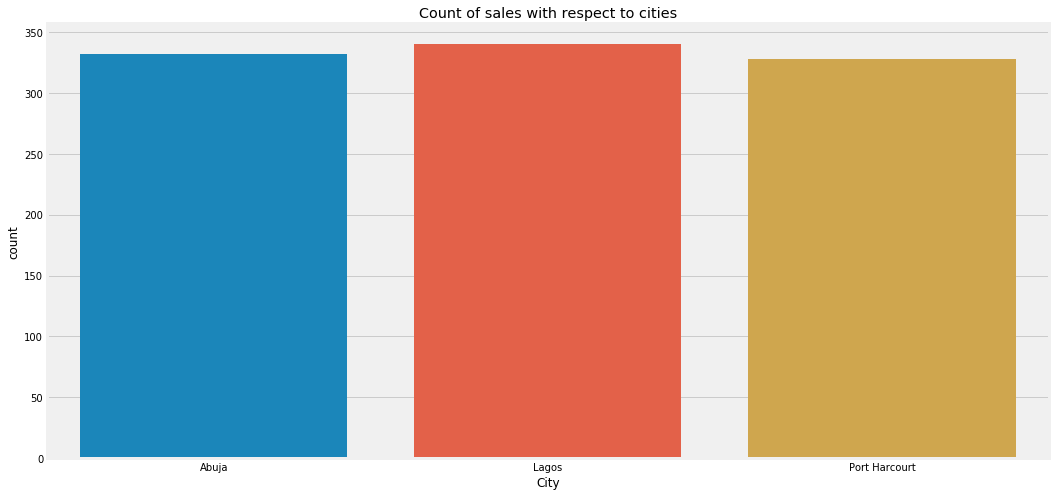

In [35]:
#[Write your Code Here]
plt.figure(figsize=(16,8))
sns.countplot(x='City',data=df)
plt.title('Count of sales with respect to cities');

#### Explore a countplot for the `Payment` and `City` Column

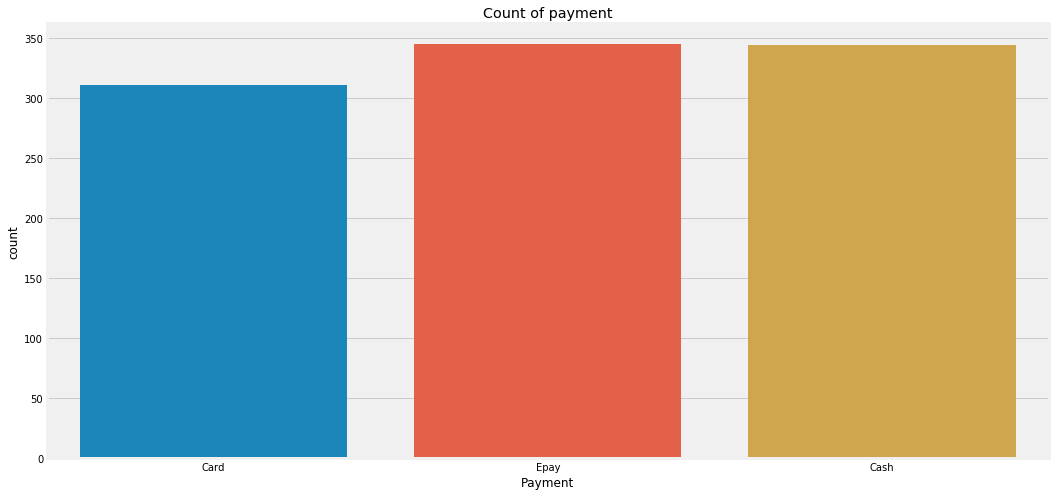

In [36]:
plt.figure(figsize=(16,8))
sns.countplot(x='Payment',data=df)
plt.title('Count of payment');

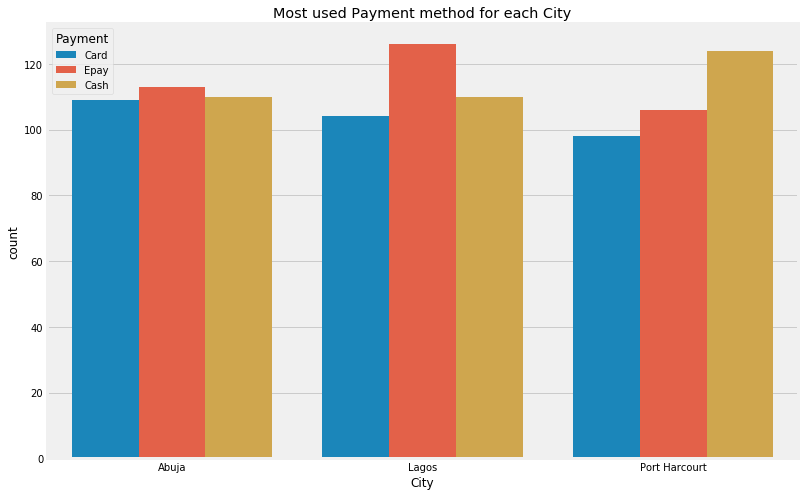

In [37]:
plt.figure(figsize=(12,8))
sns.countplot(x='City',hue='Payment',data=df)
plt.title('Most used Payment method for each City');


#### To-Do - Determine the highest & lowest sold product line, using Countplot 
Count Plot Tips- Set the `Product line` column to y-axis to prevent congestion on the x-axis

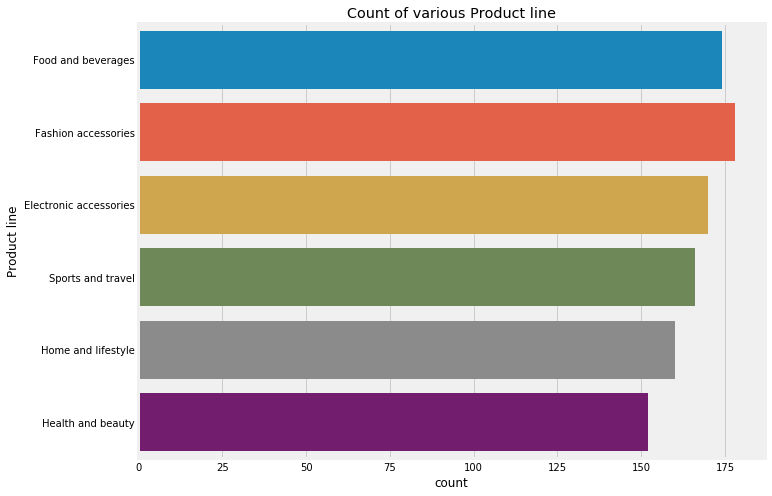

In [38]:
#[Write your Code Here]
plt.figure(figsize=(10,8))
sns.countplot(y='Product line',data=df)
plt.title('Count of various Product line');

#### To-Do -  Determine the Payment channel used by most customer to pay for each product line. Count Plot Tips- Set the "product line" column to y-axis to prevent congestion on the x-axis, and use the "hue" parameter for the "Payment" column. 

Text(0.5, 1.0, 'chart of payment channel used by most customer for each product line')

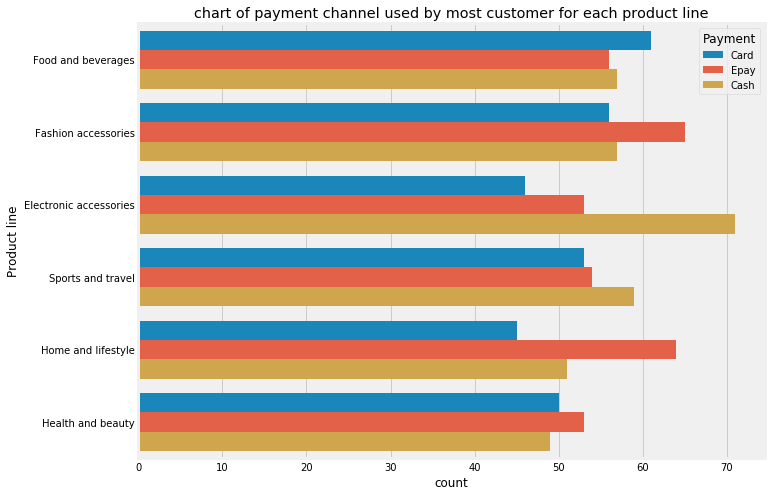

In [39]:
#[Write your Code Here]
plt.figure(figsize=(10,8))
sns.countplot(y='Product line',hue='Payment',data=df)
plt.title('chart of payment channel used by most customer for each product line')

#### To-Do- Determine the Payment channel for each branch.
Count Plot Tips - Use the hue parameter for the "branch" column

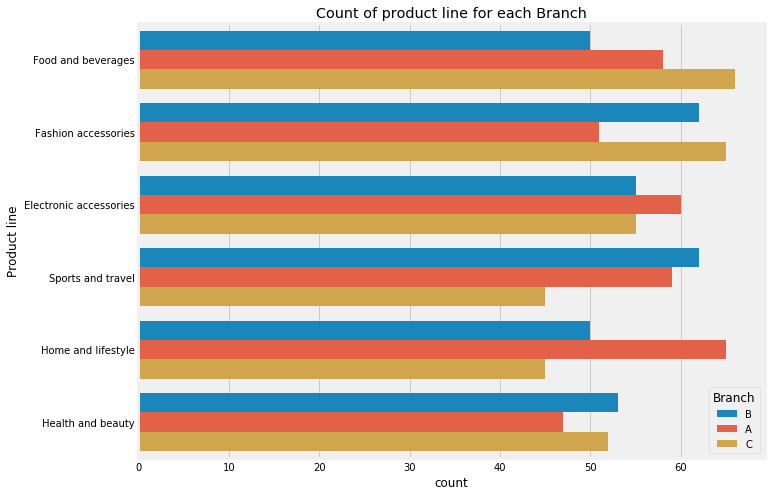

In [40]:
#[Write your Code Here]
plt.figure(figsize=(10,8))
sns.countplot(y='Product line',hue='Branch',data=df)
plt.title('Count of product line for each Branch');

#### To-Do- Determine the branch with the lowest rating. This you can determine using abox plot which gives a statistical summary of the plotted features, and you can pick out the branch with the lowest rating from the plot

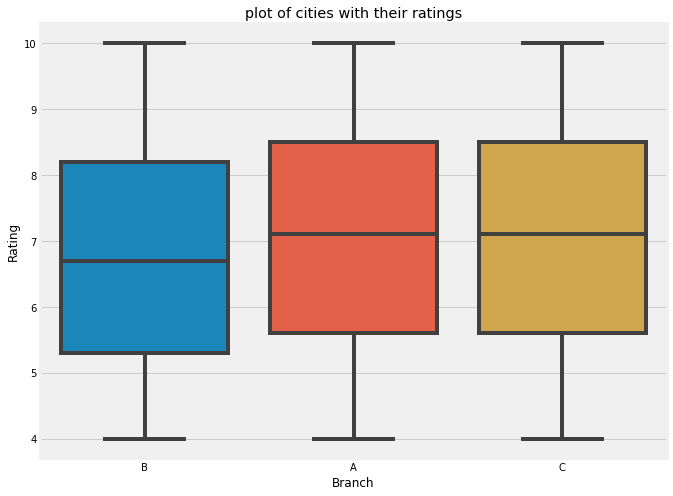

In [41]:
#[Write your Code Here]
fig,ax=plt.subplots(figsize=(10,8))
ax=sns.boxplot(y='Rating',x='Branch',data=df)
ax.set(title='plot of cities with their ratings')
plt.show();

In [42]:
# Transposing the data frame to be able to view all the features
df.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
Invoice ID,692-92-5582,351-62-0822,529-56-3974,299-46-1805,319-50-3348,371-85-5789,273-16-6619,649-29-6775,145-94-9061,871-79-8483,...,867-47-1948,256-58-3609,364-34-2972,744-82-9138,728-47-9078,148-41-7930,189-40-5216,267-62-7380,652-49-6720,233-67-5758
Branch,B,B,B,B,B,B,B,B,B,B,...,C,C,C,C,C,C,C,C,C,C
City,Abuja,Abuja,Abuja,Abuja,Abuja,Abuja,Abuja,Abuja,Abuja,Abuja,...,Port Harcourt,Port Harcourt,Port Harcourt,Port Harcourt,Port Harcourt,Port Harcourt,Port Harcourt,Port Harcourt,Port Harcourt,Port Harcourt
Customer type,Member,Member,Member,Member,Normal,Normal,Normal,Normal,Normal,Normal,...,Normal,Member,Member,Normal,Member,Normal,Normal,Member,Member,Normal
Gender,Female,Female,Male,Female,Female,Male,Male,Male,Female,Male,...,Female,Male,Male,Male,Male,Male,Male,Male,Female,Male
Product line,Food and beverages,Fashion accessories,Electronic accessories,Sports and travel,Home and lifestyle,Health and beauty,Home and lifestyle,Fashion accessories,Food and beverages,Fashion accessories,...,Home and lifestyle,Fashion accessories,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Electronic accessories,Electronic accessories,Electronic accessories,Health and beauty
Unit price,19742.4,5212.8,9183.6,33739.2,14508,31672.8,11952,12067.2,31809.6,33886.8,...,5688,33112.8,34855.2,31006.8,21452.4,35985.6,34693.2,29642.4,21942,14526
Quantity,3,4,4,6,2,3,2,1,5,5,...,10,1,3,2,4,7,7,10,1,1
Tax 5%,2961.36,1042.56,1836.72,10121.8,1450.8,4750.92,1195.2,603.36,7952.4,8471.7,...,2844,1655.64,5228.28,3100.68,4290.48,12595,12142.6,14821.2,1097.1,726.3
Total,62188.6,21893.8,38571.1,212557,30466.8,99769.3,25099.2,12670.6,167000,177906,...,59724,34768.4,109794,65114.3,90100.1,264494,254995,311245,23039.1,15252.3


#### To-Do - The gender type often affects the kind of products being purchased at the supermarket. 
* Using a catplot() generate visualization for the "product line" on x-axis, quantity on the y-axis, and hue as gender. 
<br/>

#### Set the aspect parameter to 4, so can you can effectively space out each product line. 



* Plot the same chart, but `Total Column` as the y-axis

* Write a summary of the insights you can pick from this chart.

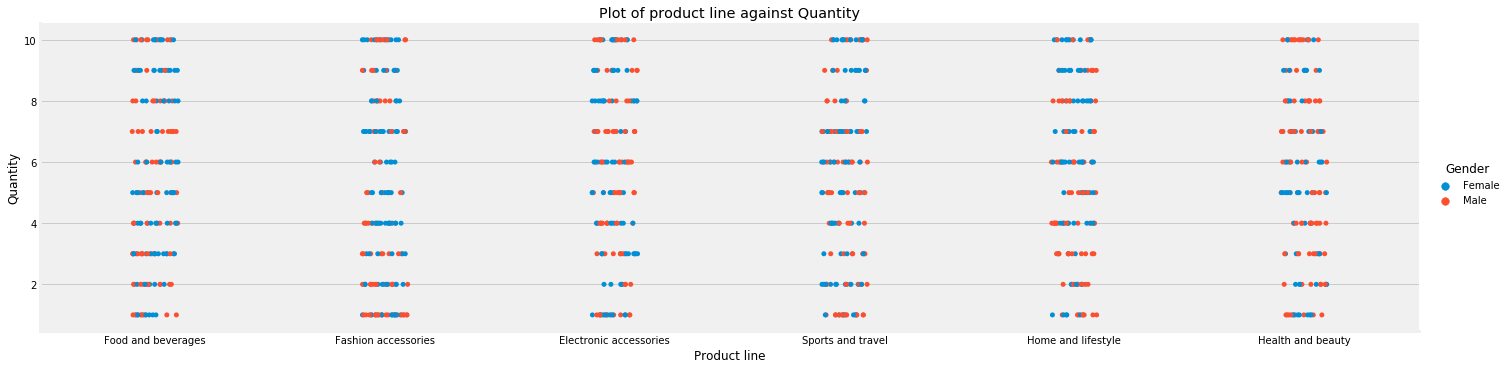

In [43]:
#[Write your Code Here]
#fig,ax=plt.subplots(figsize=(10,8))
ax=sns.catplot(x='Product line',
            y='Quantity',
            hue='Gender',
            data=df,
            aspect=4
           )
ax.set(title='Plot of product line against Quantity');

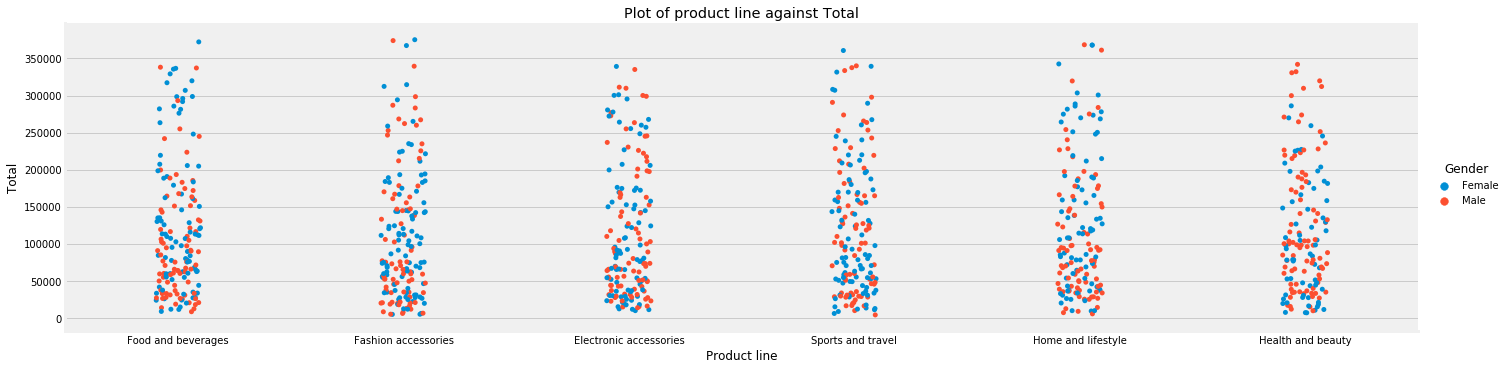

In [44]:
#[Write your Code Here]
ax=sns.catplot(x='Product line',
            y='Total',
            hue='Gender',
            data=df,
            aspect=4
           )
ax.set(title='Plot of product line against Total');

#### To-Do -  An interesting insight to explore is the interaction of Unit price on the Quantity of goods purchased. To achieve this: 
* Use the `catplot()` to plot `Product line per unit price`, and `Product line per Quantity`. Set the kind parameter to `point` 
* In a new cell, Write a summary of the insights you uncovered

In [45]:
data1=df.groupby(['Product line'])['Unit price'].sum().reset_index()
data1

,Product line,Unit price
0,Electronic accessories,3277357.2
1,Fashion accessories,3662406.0
2,Food and beverages,3508394.4
3,Health and beauty,3001636.8
4,Home and lifestyle,3186255.6
5,Sports and travel,3405916.8


Text(0.5, 1, 'Unit price for each product line')

<Figure size 1152x1152 with 0 Axes>

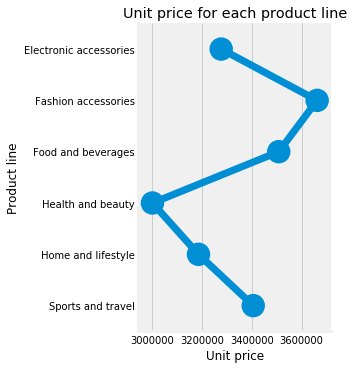

In [46]:
#[Write your Code Here]
plt.figure(figsize=(16,16))
sns.catplot(y='Product line',x='Unit price',data=data1,kind='point')
plt.title('Unit price for each product line')

#### Insights from the above chart:
*  It is seen that ***Fashion accessories*** has the highest ***Unit price*** followed by ***Food and beverages*** 

In [47]:
#[Write your Code Here]
data2=df.groupby(['Product line'])['Quantity'].sum().reset_index()
data2

,Product line,Quantity
0,Electronic accessories,971
1,Fashion accessories,902
2,Food and beverages,952
3,Health and beauty,854
4,Home and lifestyle,911
5,Sports and travel,920


Text(0.5, 1, 'Quantity demanded for each product line')

<Figure size 1152x1152 with 0 Axes>

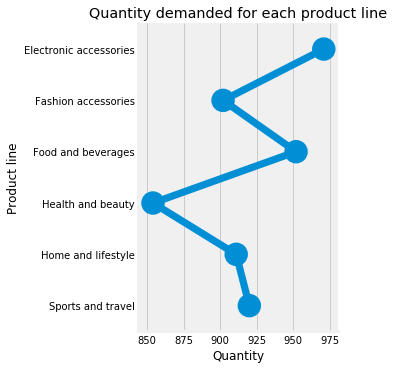

In [48]:
plt.figure(figsize=(16,16))
sns.catplot(y='Product line',x='Quantity',data=data2,kind='point')
plt.title('Quantity demanded for each product line')

#### Insights from the above chart:
*  It is seen that the product line that has the highest demand in terms of quantity is ***Electronic accessories***.
* it is important to note that we cannot draw a conclusion until we see how the demand varies in the different branches of the supermarket

## Step 7 - StandOut Section
To make your submission standout, 
* You can continue to explore more insights that can be uncovered with different plotting methods.
* Write a detailed summary on your approach, methods and insights. 
* Visit the [link](https://seaborn.pydata.org/tutorial/categorical.html) for more Seaborn visualization plots.


### Checking how the Quantity(demand) varies with various branch

In [49]:
data3=df.groupby(['Product line','Branch'])['Quantity'].sum().reset_index()
data3

,Product line,Branch,Quantity
0,Electronic accessories,A,322
1,Electronic accessories,B,316
2,Electronic accessories,C,333
3,Fashion accessories,A,263
4,Fashion accessories,B,297
5,Fashion accessories,C,342
6,Food and beverages,A,313
7,Food and beverages,B,270
8,Food and beverages,C,369
9,Health and beauty,A,257


Text(0.5, 1, 'Quantity demanded of each product line for the various branches')

<Figure size 1152x1152 with 0 Axes>

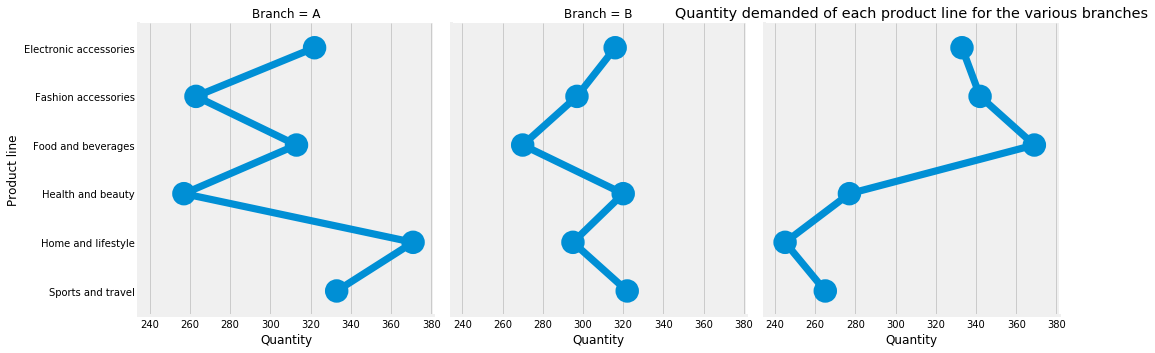

In [50]:
plt.figure(figsize=(16,16))
sns.catplot(y='Product line',x='Quantity',col='Branch',data=data3,kind='point')
plt.title('Quantity demanded of each product line for the various branches')


After dividig the plots into 3 branches, it is observed that the trends vary accoridng to the branches.If we had concluded on the information from the previous chart where the branches were not included, then we would be making a big mistake. The plots show that to really understand the dataset, we sould not ignore the categories and try to study the trends by categories(branch) and see why the trends go in the direction in which they go

#### Insights from the above chart

* from the plot, **home and lifestyle** has the highest demand in Branch A, **health and beauty** has the highest demand in Branch B and finally for Branch C, the product line with the highest demand is **Food and Beverages**

* No 3 product lines are the same for the 3 branches

* The varying difference in demand in various branches indicates differences in general taste and preference of the people in that region



### Bi-variate Analysis
#### Let's check if there's a relationship between **Unit Price** and **Quantity** using scatterplot

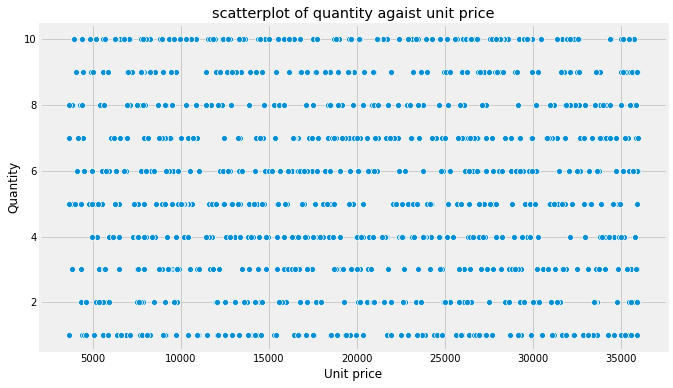

In [51]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Unit price'],y=df['Quantity'])
plt.title('scatterplot of quantity agaist unit price');

### Insights From the Scatterplot

* There's obviously no relationship between **Quantity** and **Unit price**

### Next, Let's check how the payment type and the Total amount spent by each buyer varies with Branches

In [52]:
data4=df.groupby(['Payment','Branch'])['Total'].agg([sum]).reset_index()
data4['Quantity']=df.groupby(['Payment','Branch'])['Quantity'].sum().reset_index().Quantity
data4



,Payment,Branch,sum,Quantity
0,Card,A,11914110.18,580
1,Card,B,13444148.34,599
2,Card,C,10917887.40,543
3,Cash,A,12161250.36,572
4,Cash,B,12722206.14,628
5,Cash,C,15510908.70,696
6,Epay,A,14156772.84,707
7,Epay,B,12064807.44,593
8,Epay,C,13375938.24,592


Text(0.5, 1, 'Payment type used by customer for each branch')

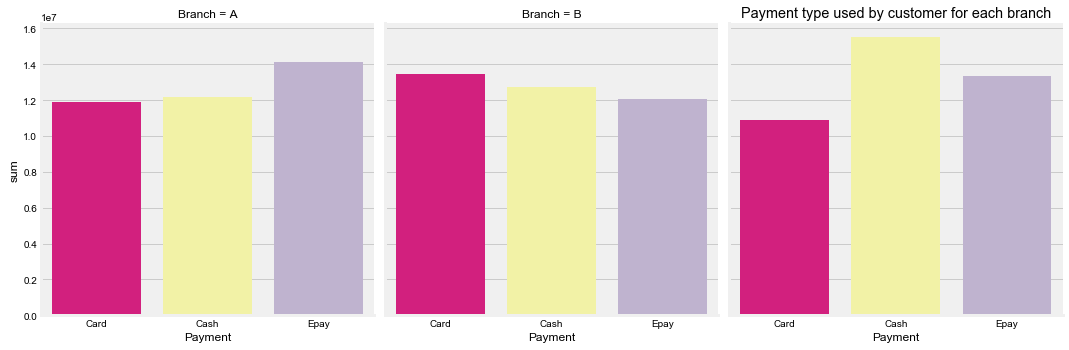

In [53]:
sns.catplot(x='Payment',y='sum',col='Branch',kind='bar',data=data4,palette='Accent_r')
sns.set_style('whitegrid')
plt.title('Payment type used by customer for each branch')

### Insights deduced
* From the bar-plot, it is seen that for branch A, it is the Epay users that has the predominat payment type while for branch 
B it is the card users and finally for Branch C, it is the people who pay in Cash that has the highest payment method.

### Customer Type Analysis

In [54]:
customer=df.groupby(['Customer type','Payment'])['Total'].sum().reset_index().sort_values(by='Total',ascending=False)
customer

,Customer type,Payment,Total
5,Normal,Epay,20952774.36
0,Member,Card,20797730.10
4,Normal,Cash,20716399.62
1,Member,Cash,19677965.58
2,Member,Epay,18644744.16
3,Normal,Card,15478415.82


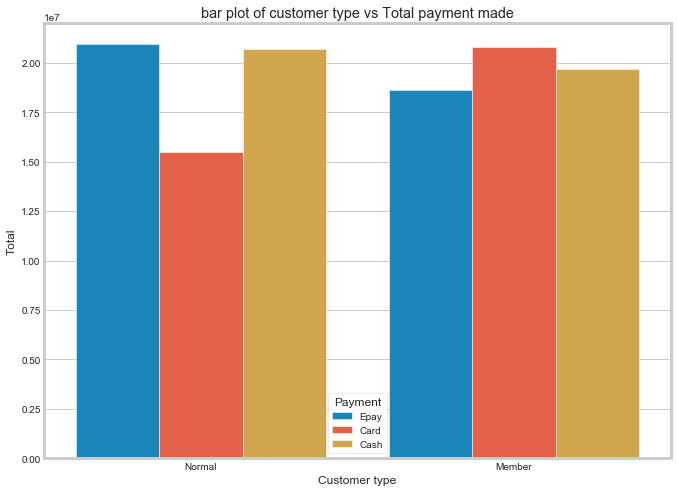

In [55]:
fig,ax=plt.subplots(figsize=(10,8))
ax=sns.barplot(x='Customer type',y='Total',hue='Payment',data=customer)
ax.set(title='bar plot of customer type vs Total payment made');

<Figure size 720x576 with 0 Axes>

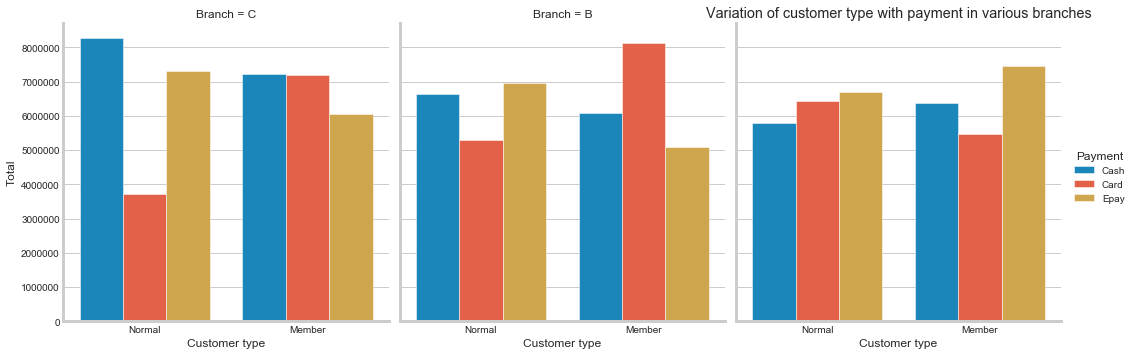

<Figure size 720x576 with 0 Axes>

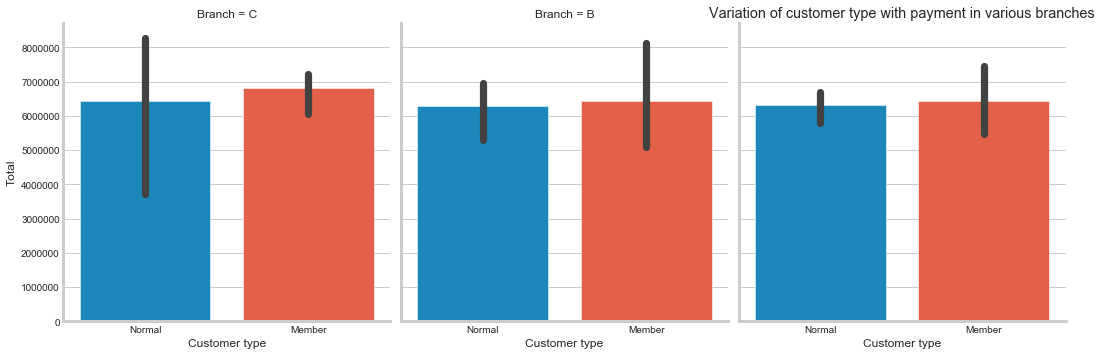

In [56]:
customer2=df.groupby(['Customer type','Payment','Branch'])['Total'].sum().reset_index().sort_values(by='Total',ascending=False)

for hue in ['Payment',None]:
    plt.figure(figsize=(10,8))
    sns.catplot(x='Customer type',y='Total',hue=hue,col='Branch',kind='bar',data=customer2)
    plt.title('Variation of customer type with payment in various branches');

### Insights Deduced
* in all 3 branches, each customer type seem to have a slight difference in the overall contribution to the cash flow.Breaking them down
into the payment types for each customer type,one can see the payment type that is more predominant for all 3 branches.

## Step 8 - Documentation.

* Write a detailed `ReadMe` that describes the project, explains important approach you followed to solve the tasks. Find a template in the starter file that can get you started quickly. Note: Do limit yourself to the template, you can include any interesting step that is worth sharing. 
* Write an Executive summary that you can present to `Company XYZ` management. The summary will explain your processes and insights you uncovered that can help the company 